# SeaHawk-HawkEye Data Visualization
This notebook serves to plot the results from calculations originally performed in Excel:

1. Alan Holmes' analysis from signal_delta_over_time.xlsx, the results of which are saved to signal_delta_over_time_plotting.csv to be read in and visualized here.
2. Alan Holmes' analysis from lunar_calibration.xlsx, the results of which are saved to lunar_calibration_results_for_plotting.csv to be read in and visualized here.
3. Sean Bailey's analysis from MOBY hawkeye_nlw_bailey20240730.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

### Baja Signal Loss Data
Visualization steps:
1. Read in signal_delta_over_time_plotting.csv
2. Extract x and y values for shorter plotting script
3. Plot

In [2]:
full_df_baja = pd.read_csv('signal_delta_over_time_plotting.csv', header = 1)
full_df_baja.head()

,Band,Band Center,Old,New,Ratio
0,1,412.97,3272.843869,2681.943010,0.819453
1,2,447.37,4359.615567,3731.050172,0.855821
2,3,488.11,6916.302409,6552.737615,0.947434
3,4,509.55,7180.894813,6745.832902,0.939414
4,5,556.69,9177.510383,8771.537676,0.955764


### Plot Baja signal loss

In [3]:
ratio = full_df_baja['Ratio']
baja_center = full_df_baja['Band Center']

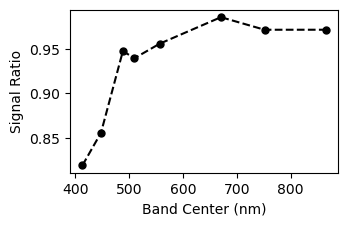

In [4]:
centim = 1/2.54  # centimeters in inches for Nature, using 'cm' for colormap
fig, axs = plt.subplots(figsize = (9.1*centim, 6*centim))

# Set global label size
plt.rcParams['axes.labelsize'] = 10

axs.plot(baja_center, ratio, 'k.--', markersize = 10)
axs.set_xlabel('Band Center (nm)')
axs.set_ylabel('Signal Ratio')

fig.tight_layout()

plt.savefig('signal_delta_over_time.png', dpi = 600, transparent=True)

### Lunar Calibration Data
Visualization steps:
1. Read in lunar_calibration_results_for_plotting.csv
2. Plot in loop to cover each date
3. Plot average separately for different symbology

### Lunar Calibration Data

In [5]:
full_df_moon = pd.read_csv('lunar_calibration_results_for_plotting.csv', header = 0)
full_df_moon.head()

,Band Center,14-Apr-22,7-Oct-22,5-Nov-22,2-Feb-23,Average
0,412.97,0.824527,0.841471,0.835619,0.810849,0.828117
1,447.37,0.880978,0.870313,0.871023,0.858548,0.870216
2,488.11,1.026571,1.039229,1.037559,1.027081,1.032610
3,509.55,0.984426,1.005966,0.982519,0.978239,0.987788
4,556.69,1.022886,1.024989,1.011203,1.007068,1.016537


### Lunar Calibration Plot

In [6]:
lunar_center = full_df_moon['Band Center']
apr22 = full_df_moon['14-Apr-22']
oct22 = full_df_moon['7-Oct-22']
nov22 = full_df_moon['5-Nov-22']
feb23 = full_df_moon['2-Feb-23']
avg = full_df_moon['Average']

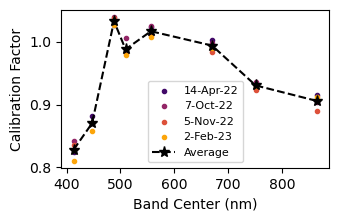

In [7]:
fig, axs = plt.subplots(figsize = (9.1*centim, 6*centim))

# Generate colors from the viridis colormap
colors = cm.inferno(np.linspace(0, .8, 5))

for i in range(1, 5):
    x = lunar_center
    y = full_df_moon.iloc[:, i]
    c = colors[i]
    l = full_df_moon.columns[i]
    axs.scatter(x, y, color=c, label=l, marker = '.')#, alpha=0.7)
    
axs.plot(lunar_center, avg, 'k*--', markersize = 8, label = 'Average')

axs.set_xlabel('Band Center (nm)')
axs.set_ylabel('Calibration Factor')
plt.legend(fontsize="8", loc ="lower center")
fig.tight_layout()

plt.savefig('lunar_calibration.png', dpi = 600, transparent=True)

### Plot both together
It will be easier to control matching styles, plot box sizes, etc. if plotted in a single figure with two subplots. Use same scripts as above but for two subplots in one figure. Use this figure for submission.

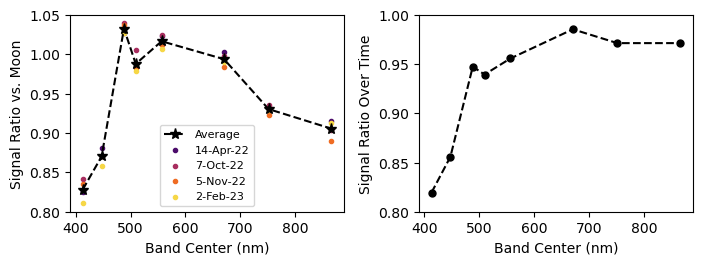

In [8]:
# Set global label and figure size
plt.rcParams['axes.labelsize'] = 10
centim = 1/2.54  # centimeters in inches for Nature, using 'cm' for colormap
fig, axs = plt.subplots(figsize = (18.1*centim, 7*centim), ncols = 2)

# Left plot
axs[0].plot(lunar_center, avg, 'k*--', markersize = 8, label = 'Average')

# Generate colors 
colors = cm.inferno(np.linspace(0, .9, 5))
for i in range(1, 5):
    x = lunar_center
    y = full_df_moon.iloc[:, i]
    c = colors[i]
    l = full_df_moon.columns[i]
    axs[0].scatter(x, y, color=c, label=l, marker = '.')#, alpha=0.7)
    

axs[0].set_xlabel('Band Center (nm)')
axs[0].set_ylabel('Signal Ratio vs. Moon')
axs[0].legend(fontsize="8", loc ="lower center")
axs[0].set_ylim([0.8, 1.05])

# Right Plot
axs[1].plot(baja_center, ratio, 'k.--', markersize = 10)
axs[1].set_xlabel('Band Center (nm)')
axs[1].set_ylabel('Signal Ratio Over Time')
axs[1].set_ylim([0.8, 1])

fig.tight_layout()

plt.savefig('signal_change_lunar_cal.png', dpi = 600, transparent=True)

### MOBY data comparison
HawkEye normalized water-leaving radiance values are provided by NASA SeaDAS (https://seadas.gsfc.nasa.gov) for 9 days where HawkEye images were available. Normalized water-leaving radiances are also calculated at those nine times from MOBY climatology (labeled with _insitu_ suffix). MOBY climatology calculations follow P. Jeremy Werdell, Sean W. Bailey, Bryan A. Franz, André Morel, and Charles R. McClain, "On-orbit vicarious calibration of ocean color sensors using an ocean surface reflectance model," Appl. Opt. 46, 5649-5666 (2007) https://doi.org/10.1364/AO.46.005649 and can be found as a project on NASA's SMCE (Science Managed Cloud Environment) Gitlab at https://git.smce.nasa.gov/explore. The direct link to the project is https://git.smce.nasa.gov/oel/orm_morel. 

In [9]:
full_df_moby = pd.read_csv('hawkeye_nlw_moby.csv', header = 0)
full_df_moby.head()

,Date,Lwn_412,Lwn_447,Lwn_488,Lwn_510,Lwn_556,Lwn_670,Lwn_412-insitu,Lwn_447-insitu,Lwn_488-insitu,Lwn_510-insitu,Lwn_556-insitu,Lwn_670-insitu
0,20210429T205304,2.52,2.18,1.35,0.636,0.296,0.0,2.43,2.07,1.46,0.756,0.325,0.0197
1,20210518T204854,2.42,2.05,1.43,0.731,0.130,0.0,2.45,2.08,1.47,0.757,0.324,0.0196
2,20210607T204923,2.54,2.12,1.37,0.687,0.250,0.0,2.45,2.08,1.47,0.756,0.324,0.0196
3,20210608T205411,2.72,2.26,1.38,0.729,0.410,0.0,2.46,2.09,1.47,0.758,0.325,0.0197
4,20220206T204114,2.17,1.85,1.24,0.613,0.321,0.0,2.10,1.78,1.26,0.658,0.283,0.0169


In [10]:
df_moby_dates = full_df_moby.iloc[:, 0]
df_moby_hawkeye = full_df_moby.iloc[:, 1:7]
df_moby_hawkeye.head()

,Lwn_412,Lwn_447,Lwn_488,Lwn_510,Lwn_556,Lwn_670
0,2.52,2.18,1.35,0.636,0.296,0.0
1,2.42,2.05,1.43,0.731,0.130,0.0
2,2.54,2.12,1.37,0.687,0.250,0.0
3,2.72,2.26,1.38,0.729,0.410,0.0
4,2.17,1.85,1.24,0.613,0.321,0.0


In [11]:
df_moby_insitu = full_df_moby.iloc[:, 7:]
df_moby_insitu.head()

,Lwn_412-insitu,Lwn_447-insitu,Lwn_488-insitu,Lwn_510-insitu,Lwn_556-insitu,Lwn_670-insitu
0,2.43,2.07,1.46,0.756,0.325,0.0197
1,2.45,2.08,1.47,0.757,0.324,0.0196
2,2.45,2.08,1.47,0.756,0.324,0.0196
3,2.46,2.09,1.47,0.758,0.325,0.0197
4,2.10,1.78,1.26,0.658,0.283,0.0169


In [12]:
# Extract band centers with more significant digits from above
moby_center = lunar_center[0:6] # calculations don't include IR bands
print(moby_center)

0    412.97
1    447.37
2    488.11
3    509.55
4    556.69
5    670.37
Name: Band Center, dtype: float64


In [13]:
print(df_moby_dates)

0    20210429T205304
1    20210518T204854
2    20210607T204923
3    20210608T205411
4    20220206T204114
5    20220207T204518
6    20221004T202827
7    20230515T201206
8    20230516T201319
Name: Date, dtype: object


In [14]:
# Reformat manually
date_moby = ['2021-Apr-29',
             '2021-May-18',
             '2021-Jun-07',
             '2021-Jun-08',
             '2022-Feb-06',
             '2022-Feb-07',
             '2022-Oct-04',
             '2023-May-15',
             '2023-May-16']

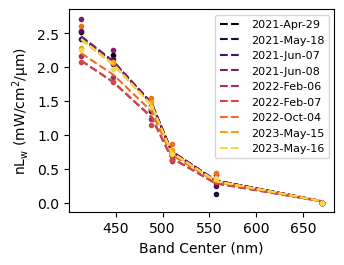

In [15]:
# Set global label and figure size
fig, axs = plt.subplots(figsize = (9*centim, 7*centim))

# Generate colors 
colors_moby = cm.inferno(np.linspace(0, .9, 9))
for i in range(0, 9):
    x = moby_center
    y_insitu = df_moby_insitu.iloc[i, :]
    y_hawkeye = df_moby_hawkeye.iloc[i, :]
    c = colors_moby[i]
    l = date_moby[i]
    axs.plot(x, y_insitu, '--', color=c, label=l)#, alpha=0.7)
    axs.plot(x, y_hawkeye, '.', color=c)#, alpha=0.7)
    
axs.set_xlabel('Band Center (nm)')
axs.set_ylabel(r'$\mathrm{nL_w\ (mW/cm^2/µm)}$')
axs.legend(fontsize="8", loc ="upper right")

fig.tight_layout()

plt.savefig('moby_fig.png', dpi = 600, transparent=True)